In [34]:
import moviepy.editor as mp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.signal
import wave, sys
import audio2numpy as a2n
from audio2numpy import open_audio
from scipy.fft import fft, ifft
from scipy.io import wavfile
from scipy.io.wavfile import read
import scipy.io
from pydub import AudioSegment
import pandas as pd
import os
import ffmpeg

SyntaxError: invalid syntax (<ipython-input-34-58ea6e28eceb>, line 17)

In [40]:
### importing video of interest
 
## Laptop
# video = mp.VideoFileClip(r"\Users\greenhouselab\Documents\Rubi\typingtask_pilotdata\GX010029.MP4")

## Home desktop
video_path = r"/home/rubi/Desktop/Action Control Lab/task_data/video/GX010029.MP4"
video = mp.VideoFileClip(video_path)

In [4]:
### extracting audio file from video
audio = video.audio.write_audiofile(r"isaiah_frontal1.wav")

chunk:   1%|▏         | 153/11721 [00:00<00:08, 1342.97it/s, now=None]

MoviePy - Writing audio in isaiah_frontal1.wav


MoviePy - Done.


In [6]:
### defining audio file location
audio_file = 'isaiah_frontal1.wav'

In [8]:
### turning stereo audio file to mono
audio = AudioSegment.from_wav(audio_file)
audio = audio.set_channels(1)
## Laptop
# audio = audio.export('/Users/greenhouselab/Documents/Rubi/video_clipping/.wav', format="wav")
## Desktop
audio = audio.export('/home/rubi/Desktop/Github/typingexp/video_clipping/.wav', format="wav")

In [9]:
### making numpy array from audio file
sample_rate, samples = wavfile.read(audio)

In [10]:
sample_rate

44100

In [11]:
samples

array([  0,   0,   0, ..., 318, 346, 377], dtype=int16)

In [12]:
len(samples)

23440914

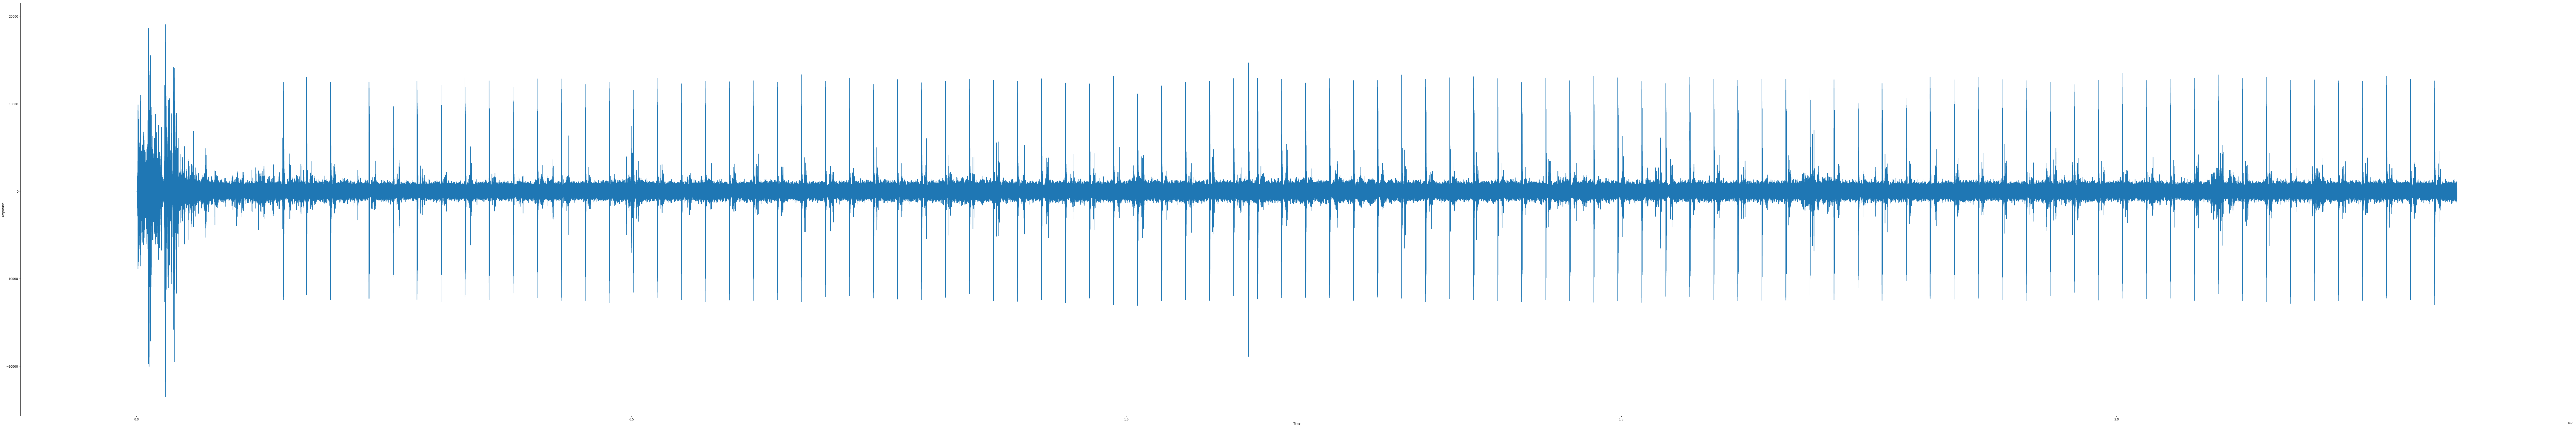

In [13]:
plt.rcParams["figure.figsize"] = [120, 20]
plt.rcParams["figure.autolayout"] = True
input_data = samples
plt.plot(input_data)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.ylim()
plt.xlim()
plt.show()

In [14]:
# run peak detection to see if there are 120 peaks here

indexes, _ = scipy.signal.find_peaks(samples, height=7, distance=2.1)
print('Peaks are: %s' % (indexes))

Peaks are: [    8967     8972     8976 ... 23440788 23440800 23440808]


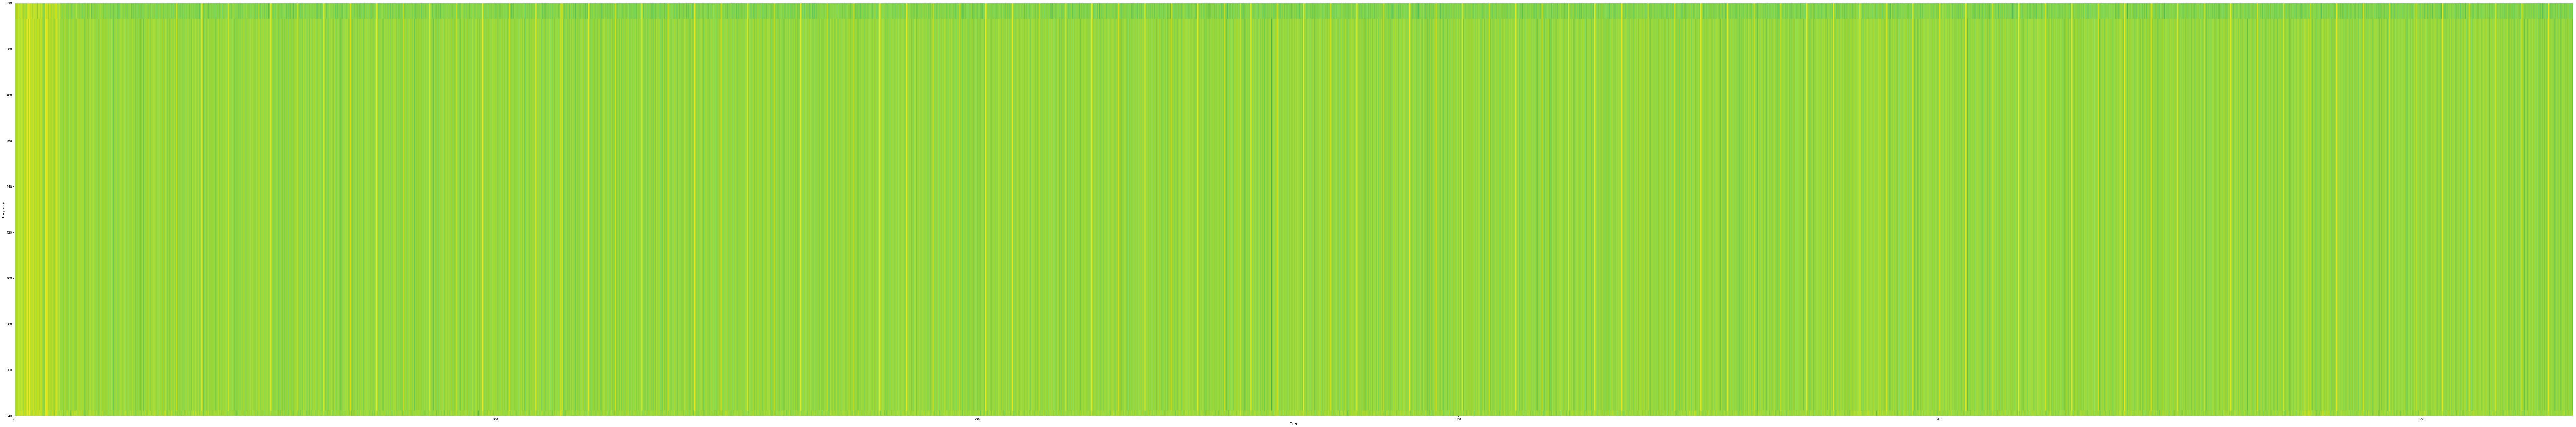

In [15]:
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(samples, Fs=sample_rate)
plt.rcParams["figure.figsize"] = [12, 6]
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.ylim(340, 520)
plt.show()

In [16]:
## need to go through the row that correponds with 440hz (2 and 3 are closest) in powerspectrum, and time stamps of peaks. 

In [17]:
time[1]

0.005804988662131519

In [18]:
powerSpectrum[3]

array([ 0.        ,  0.        ,  0.        , ..., 50.98064352,
       10.71275098, 68.3617863 ])

In [19]:
# def find_beep(freq):
#     lowA = pd.()
#     for x in freq:
#         lowA.append(x)

In [20]:
# find_beep(powerSpectrum[3])

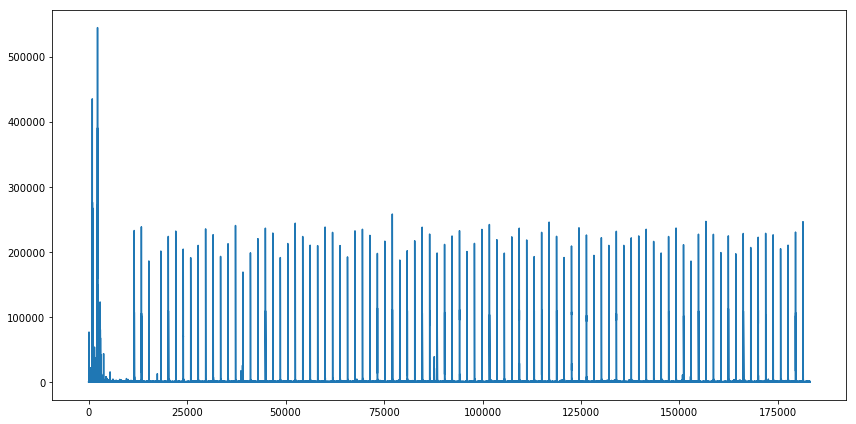

<Figure size 8640x1440 with 0 Axes>

In [21]:
lowA = np.array(powerSpectrum[2])
# plt.rcParams.update({'font.size': 50})
plt.plot(lowA)
plt.figure(figsize=(120, 20))
plt.show()

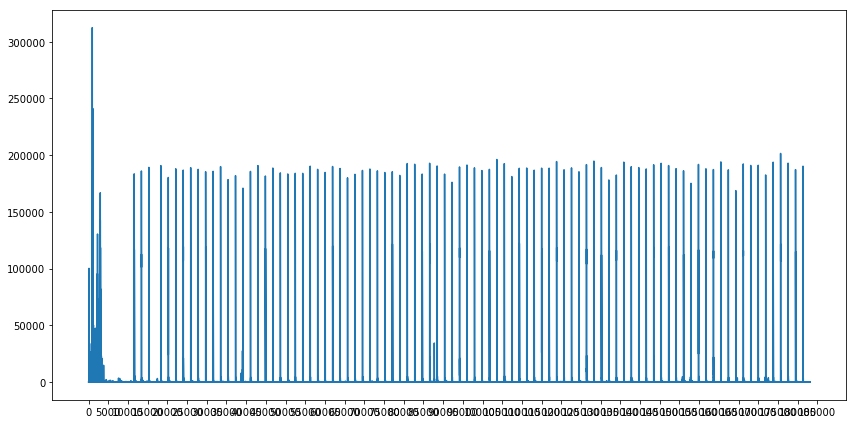

In [22]:
highA = np.array(powerSpectrum[3])
plt.plot(highA)
# plt.figure(figsize=(120, 20))
plt.xlim()
plt.xticks(np.arange(0, 190000, step=5000))
plt.show()

In [23]:
indexes, _ = scipy.signal.find_peaks(highA, height=150000, distance=120)
len(indexes)

93

In [24]:
## get time stamps for each peak from 'time' output of spectrogram
def find_peak_times(): 
    peak_times = np.empty(np.shape(indexes))
    for idx, x in enumerate(indexes):
        stamp = time[x]
        peak_times[idx] = stamp
    return peak_times

In [48]:
cut_times = (find_peak_times()).tolist()
cut_times

[2.766077097505669,
 3.175328798185941,
 8.658140589569161,
 33.66603174603175,
 38.94857142857143,
 44.44589569160998,
 53.27238095238095,
 58.760997732426304,
 64.26702947845806,
 69.77015873015873,
 75.26748299319728,
 80.7677097505669,
 86.27083900226758,
 91.78848072562359,
 97.2887074829932,
 102.7889342403628,
 108.29206349206349,
 113.78938775510204,
 119.28961451247166,
 124.79274376417233,
 130.28426303854874,
 135.79319727891158,
 141.29342403628118,
 146.79365079365078,
 152.28807256235828,
 157.79990929705215,
 163.2972335600907,
 168.79746031746032,
 174.29768707482992,
 179.79791383219955,
 185.29814058956916,
 190.7983673469388,
 196.29569160997733,
 201.80172335600906,
 207.3019501133787,
 212.8021768707483,
 218.3024036281179,
 223.7968253968254,
 229.3057596371882,
 234.80598639455783,
 240.30621315192744,
 245.80063492063493,
 251.30956916099774,
 256.80979591836734,
 262.3071201814059,
 267.80734693877554,
 273.3104761904762,
 278.8107029478458,
 284.3109297052154,

In [29]:
# for idx, cut in enumerate(cut_times):
#     clip = video.subclip(cut, cut+3.5)
#     name = 'trial_%s.mp4' % idx
#     clip.write_videofile(name)

In [46]:
import os

for idx, cut in enumerate(cut_times):
    command = 'ffmpeg -t 3.5 -ss %s -i "%s" -y trial_%s.mp4' % (cut, video_path, idx)
    print(command)
    os.system(command)
#     clip_name = 'trial_%s.mp4' % idx
#     trim(video, clip_name, cut, cut+3.5)

ffmpeg -t 3.5 -ss 2.766077097505669 -i "/home/rubi/Desktop/Action Control Lab/task_data/video/GX010029.MP4" -y trial_0.mp4
ffmpeg -t 3.5 -ss 3.175328798185941 -i "/home/rubi/Desktop/Action Control Lab/task_data/video/GX010029.MP4" -y trial_1.mp4
ffmpeg -t 3.5 -ss 8.658140589569161 -i "/home/rubi/Desktop/Action Control Lab/task_data/video/GX010029.MP4" -y trial_2.mp4
ffmpeg -t 3.5 -ss 33.66603174603175 -i "/home/rubi/Desktop/Action Control Lab/task_data/video/GX010029.MP4" -y trial_3.mp4
ffmpeg -t 3.5 -ss 38.94857142857143 -i "/home/rubi/Desktop/Action Control Lab/task_data/video/GX010029.MP4" -y trial_4.mp4
ffmpeg -t 3.5 -ss 44.44589569160998 -i "/home/rubi/Desktop/Action Control Lab/task_data/video/GX010029.MP4" -y trial_5.mp4
ffmpeg -t 3.5 -ss 53.27238095238095 -i "/home/rubi/Desktop/Action Control Lab/task_data/video/GX010029.MP4" -y trial_6.mp4
ffmpeg -t 3.5 -ss 58.760997732426304 -i "/home/rubi/Desktop/Action Control Lab/task_data/video/GX010029.MP4" -y trial_7.mp4
ffmpeg -t 3.5 -